# Remember to save this as a new notebook before you begin solving!!
# Also remember to open the notebook through a virtual env that works well with keras

### This exercise is meant to teach you the very beginning of working with neural networks. You will generate your own data for this exercise

##### Author: Philip Tannor

### We'll start off with creating the data: 
### 1) Generate a numpy array named 'X', which contains 10000 random numbers in the range (0,1)
### 2) Create a vector named 'y_easy', which contains the vector sqrt (X*3 +5). This is a function that will be very easy for a neural network to "understand".
### 3) Create a vector named 'y_difficult', which contains the sine (sinus) of the following function (applied to X):
###### def weird_change(x):
       if x>0.5:
            return 1+x
        if x<0.3:
            return -x
        return x

In [1]:
import numpy as np

X = np.random.random(10000)
print(X.max(), X.min())

0.9997287542165751 3.063184093954341e-05


In [2]:
y_easy = np.sqrt(X*3 + 5)

In [3]:
def weird_change(x):
    if x>0.5:
        return 1+x
    if x<0.3:
        return -x
    return x

In [4]:
y_difficult = np.sin(np.pi * np.array([weird_change(x) for x in list(X)]))

##### Now we create the simplest possible neural network:
##### 1) input layer with 1 unit and output layer (dense) with 1 unit 
##### 2) no activation function
##### Use this NN to try to predict y_easy from X (why does this work? discuss this with your tutor)
#### For this you need to import Model from keras.models, and the layers you need from keras.layers. You'll have to decide on the following parameters: which optimizer, which loss, and batch size. It should be fairly straightforward, but this also may be worth discussing with your instructor. Run 100 epochs (make sure you know what this means)

In [5]:
from tensorflow import keras
from keras.layers import Input, Dense

In [6]:
model = keras.Sequential(
    [
        Input(shape = (1,)),
        Dense(1, name="layer1"),
    ]
)
model.compile(optimizer='RMSprop', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X, y_easy, batch_size=150, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
54/54 - 0s - loss: 6.4397 - val_loss: 6.2502
Epoch 2/100
54/54 - 0s - loss: 6.0265 - val_loss: 5.8489
Epoch 3/100
54/54 - 0s - loss: 5.6359 - val_loss: 5.4617
Epoch 4/100
54/54 - 0s - loss: 5.2584 - val_loss: 5.0887
Epoch 5/100
54/54 - 0s - loss: 4.8946 - val_loss: 4.7287
Epoch 6/100
54/54 - 0s - loss: 4.5441 - val_loss: 4.3825
Epoch 7/100
54/54 - 0s - loss: 4.2072 - val_loss: 4.0497
Epoch 8/100
54/54 - 0s - loss: 3.8832 - val_loss: 3.7299
Epoch 9/100
54/54 - 0s - loss: 3.5723 - val_loss: 3.4241
Epoch 10/100
54/54 - 0s - loss: 3.2750 - val_loss: 3.1316
Epoch 11/100
54/54 - 0s - loss: 2.9912 - val_loss: 2.8528
Epoch 12/100
54/54 - 0s - loss: 2.7206 - val_loss: 2.5869
Epoch 13/100
54/54 - 0s - loss: 2.4638 - val_loss: 2.3355
Epoch 14/100
54/54 - 0s - loss: 2.2197 - val_loss: 2.0969
Epoch 15/100
54/54 - 0s - loss: 1.9891 - val_loss: 1.8718
Epoch 16/100
54/54 - 0s - loss: 1.7719 - val_loss: 1.6602
Epoch 17/100
54/54 - 0s - loss: 1.5681 - val_loss: 1.4623
Epoch 18/100
54/54 - 0s

### Now take a glimpse at y_easy, and a glimpse at the predictions of your model. Are they similar?

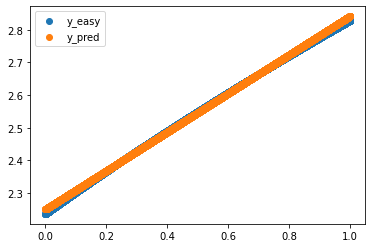

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y_easy, label="y_easy")
plt.scatter(X, model.predict(X)[:,0], label="y_pred")
plt.legend()

### Now create another neural network with the exact same architecture. Use it to try to predict y_hard. 

In [9]:
model = keras.Sequential(
    [
        Input(shape = (1,)),
        Dense(1, name="layer1"),
    ]
)
model.compile(optimizer='RMSprop', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X, y_difficult, batch_size=150, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
54/54 - 0s - loss: 0.4382 - val_loss: 0.4380
Epoch 2/100
54/54 - 0s - loss: 0.4270 - val_loss: 0.4309
Epoch 3/100
54/54 - 0s - loss: 0.4231 - val_loss: 0.4283
Epoch 4/100
54/54 - 0s - loss: 0.4216 - val_loss: 0.4271
Epoch 5/100
54/54 - 0s - loss: 0.4206 - val_loss: 0.4260
Epoch 6/100
54/54 - 0s - loss: 0.4197 - val_loss: 0.4254
Epoch 7/100
54/54 - 0s - loss: 0.4191 - val_loss: 0.4250
Epoch 8/100
54/54 - 0s - loss: 0.4186 - val_loss: 0.4245
Epoch 9/100
54/54 - 0s - loss: 0.4182 - val_loss: 0.4241
Epoch 10/100
54/54 - 0s - loss: 0.4178 - val_loss: 0.4239
Epoch 11/100
54/54 - 0s - loss: 0.4175 - val_loss: 0.4235
Epoch 12/100
54/54 - 0s - loss: 0.4173 - val_loss: 0.4235
Epoch 13/100
54/54 - 0s - loss: 0.4171 - val_loss: 0.4233
Epoch 14/100
54/54 - 0s - loss: 0.4170 - val_loss: 0.4232
Epoch 15/100
54/54 - 0s - loss: 0.4168 - val_loss: 0.4232
Epoch 16/100
54/54 - 0s - loss: 0.4167 - val_loss: 0.4230
Epoch 17/100
54/54 - 0s - loss: 0.4167 - val_loss: 0.4229
Epoch 18/100
54/54 - 0s

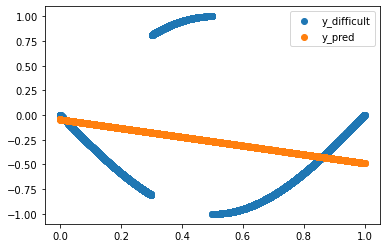

In [11]:
plt.scatter(X, y_difficult, label="y_difficult")
plt.scatter(X, model.predict(X)[:,0], label="y_pred")
plt.legend()

### Why didn't  this work? Discuss this matter with your Instructor, and then proceed

### Now create a new NN with the same input and output layers, but add 3 Dense layers between them with 5 units each. For these layers you should choose a non-linear activation function. Does this work?

In [12]:
model_advanced = keras.Sequential(
    [
        Input(shape = (1,)),
        Dense(5, name="hidden_layer_1", activation='tanh'),
        Dense(5, name="hidden_layer_2", activation='tanh'),
        Dense(5, name="hidden_layer_3", activation='tanh'),
        Dense(1, name="output_layer"),
    ]
)
model_advanced.compile(optimizer='RMSprop', loss='mse')
model_advanced.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 5)                 10        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 5)                 30        
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 5)                 30        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_advanced.fit(X, y_difficult, batch_size=150, epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
54/54 - 0s - loss: 0.4825 - val_loss: 0.4374
Epoch 2/100
54/54 - 0s - loss: 0.4258 - val_loss: 0.4280
Epoch 3/100
54/54 - 0s - loss: 0.4196 - val_loss: 0.4251
Epoch 4/100
54/54 - 0s - loss: 0.4181 - val_loss: 0.4245
Epoch 5/100
54/54 - 0s - loss: 0.4179 - val_loss: 0.4248
Epoch 6/100
54/54 - 0s - loss: 0.4177 - val_loss: 0.4245
Epoch 7/100
54/54 - 0s - loss: 0.4177 - val_loss: 0.4244
Epoch 8/100
54/54 - 0s - loss: 0.4175 - val_loss: 0.4240
Epoch 9/100
54/54 - 0s - loss: 0.4173 - val_loss: 0.4236
Epoch 10/100
54/54 - 0s - loss: 0.4171 - val_loss: 0.4236
Epoch 11/100
54/54 - 0s - loss: 0.4171 - val_loss: 0.4233
Epoch 12/100
54/54 - 0s - loss: 0.4166 - val_loss: 0.4233
Epoch 13/100
54/54 - 0s - loss: 0.4171 - val_loss: 0.4230
Epoch 14/100
54/54 - 0s - loss: 0.4166 - val_loss: 0.4233
Epoch 15/100
54/54 - 0s - loss: 0.4165 - val_loss: 0.4228
Epoch 16/100
54/54 - 0s - loss: 0.4166 - val_loss: 0.4238
Epoch 17/100
54/54 - 0s - loss: 0.4163 - val_loss: 0.4225
Epoch 18/100
54/54 - 0s

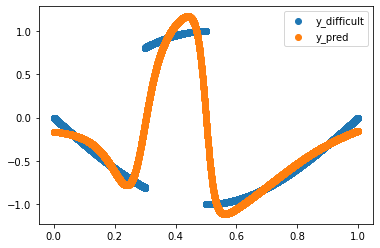

In [14]:
plt.scatter(X, y_difficult, label="y_difficult")
plt.scatter(X, model_advanced.predict(X)[:,0], label="y_pred")
plt.legend()

### Well done! 
### Now I want you to test the limits of this NN. Try to find a function which won't be learned well by this NN, and show that your NN doesn't manage to train on it. Don't use the old model (create a new, identical one - in new cells)

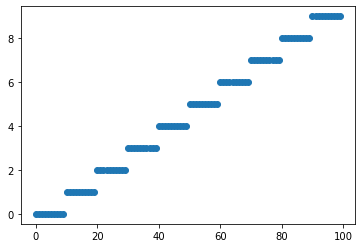

In [21]:
y = []
for i in range(10):
    y.append(np.ones(shape=10)*i)

y = np.hstack(y)
x = np.arange(0, y.shape[0])

plt.scatter(x, y)

In [38]:
model_advanced = keras.Sequential(
    [
        Input(shape = (1,)),
        Dense(50, activation='tanh'),
        Dense(25, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(25, activation='tanh'),
        Dense(50, activation='tanh'),
        Dense(50, activation='tanh'),
        Dense(1, name="output_layer"),
    ]
)
model_advanced.compile(optimizer='adam', loss='mse')
model_advanced.summary()

model_advanced.fit(x, y, batch_size=150, epochs=100, verbose=2, validation_split=0.2)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_26 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_31 (Dense)             (None, 50)              

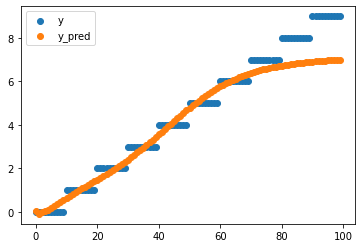

In [39]:
plt.scatter(x, y, label="y")
plt.scatter(x, model_advanced.predict(x)[:,0], label="y_pred")
plt.legend()

### You're basically finished, but if you're still curious about the architecture of the NN, try playing with it - and see how the changes affect the learning process (on y_hard). You can change the # of hidden layers, # of units in each layer, activation function.

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_34 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_39 (Dense)             (None, 50)              

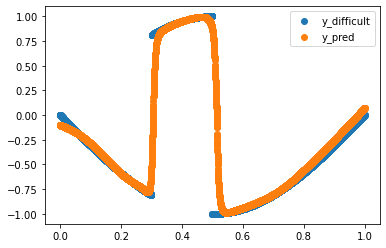

In [40]:
model_advanced = keras.Sequential(
    [
        Input(shape = (1,)),
        Dense(50, activation='tanh'),
        Dense(25, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(25, activation='tanh'),
        Dense(50, activation='tanh'),
        Dense(50, activation='tanh'),
        Dense(1, name="output_layer"),
    ]
)
model_advanced.compile(optimizer='RMSprop', loss='mse')
model_advanced.summary()

model_advanced.fit(X, y_difficult, batch_size=150, epochs=100, verbose=2, validation_split=0.2)

plt.scatter(X, y_difficult, label="y_difficult")
plt.scatter(X, model_advanced.predict(X)[:,0], label="y_pred")
plt.legend()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_42 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_47 (Dense)             (None, 50)              

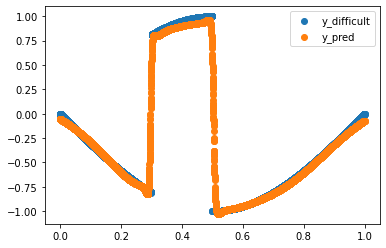

In [41]:
model_advanced = keras.Sequential(
    [
        Input(shape = (1,)),
        Dense(50, activation='tanh'),
        Dense(25, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(25, activation='tanh'),
        Dense(50, activation='tanh'),
        Dense(50, activation='tanh'),
        Dense(1, name="output_layer"),
    ]
)
model_advanced.compile(optimizer='adam', loss='mse')
model_advanced.summary()

model_advanced.fit(X, y_difficult, batch_size=150, epochs=100, verbose=2, validation_split=0.2)

plt.scatter(X, y_difficult, label="y_difficult")
plt.scatter(X, model_advanced.predict(X)[:,0], label="y_pred")
plt.legend()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_50 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_53 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_54 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_55 (Dense)             (None, 50)              

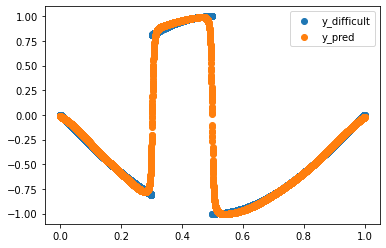

In [42]:
model_advanced = keras.Sequential(
    [
        Input(shape = (1,)),
        Dense(50, activation='tanh'),
        Dense(25, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(25, activation='tanh'),
        Dense(50, activation='tanh'),
        Dense(50, activation='tanh'),
        Dense(1, name="output_layer"),
    ]
)
model_advanced.compile(optimizer='adam', loss='mse')
model_advanced.summary()

model_advanced.fit(X, y_difficult, batch_size=20, epochs=100, verbose=2, validation_split=0.2)

plt.scatter(X, y_difficult, label="y_difficult")
plt.scatter(X, model_advanced.predict(X)[:,0], label="y_pred")
plt.legend()